In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score##### data split,cross validation.


In [121]:
#load the dataset
df=pd.read_csv("/content/elecdemand.csv")


In [122]:
df = df[df["temp"] > 15]

In [123]:
df.head()

,demand,workday,temp
0,3.914647,0,18.2
1,3.672550,0,17.9
2,3.497539,0,17.6
3,3.339145,0,16.8
4,3.204313,0,16.3


In [124]:
##  DATA CLEANING #
#Check the null values.
#how many numericals columns in data.


In [125]:
df.isnull().sum()

demand     0
workday    0
temp       0
dtype: int64

In [126]:
df.dtypes

demand     float64
workday      int64
temp       float64
dtype: object

In [127]:
####   EDA   ####
#Corelation Matrix Heatmap  ##
df.corr()

,demand,workday,temp
demand,1.000000,0.407122,0.593519
workday,0.407122,1.000000,-0.004175
temp,0.593519,-0.004175,1.000000


In [128]:
df.corr()#depedent data

,demand,workday,temp
demand,1.000000,0.407122,0.593519
workday,0.407122,1.000000,-0.004175
temp,0.593519,-0.004175,1.000000


In [129]:
df.corr()["demand"]#dependent variable

demand     1.000000
workday    0.407122
temp       0.593519
Name: demand, dtype: float64

<Axes: >

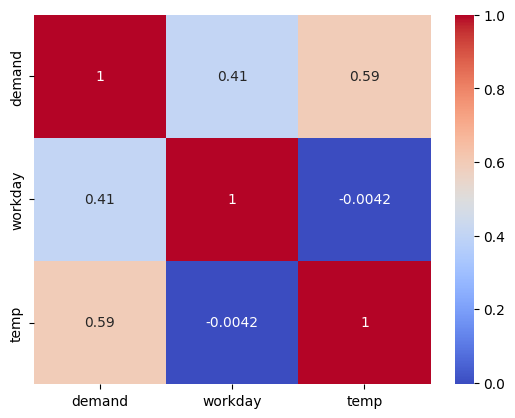

In [130]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

<Axes: >

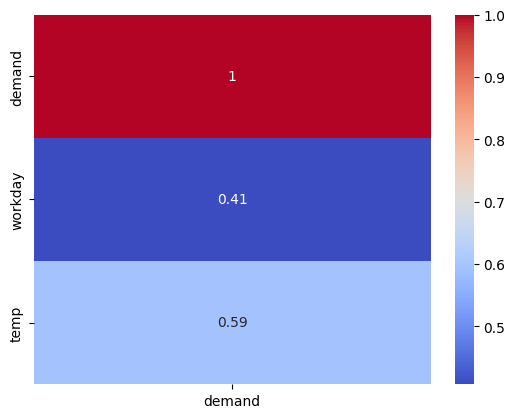

In [131]:
sns.heatmap(df.corr()[['demand']],annot=True,cmap='coolwarm')

In [132]:
##  EDA  ##
#Pairplot

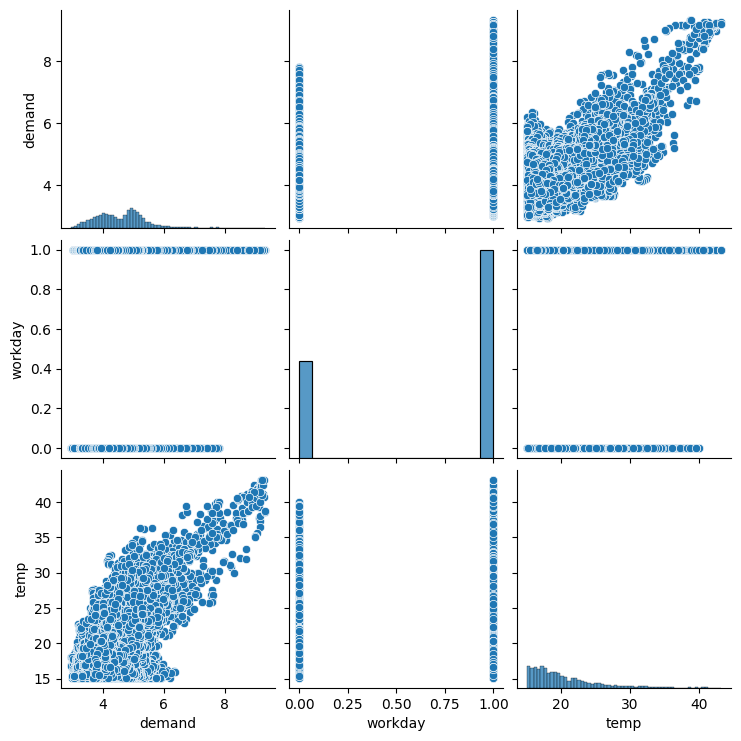

In [133]:
sns.pairplot(df)

In [134]:
#Create our feature matrix (X) and target vector (y)

#temp
#workday
#demand

#The demand column is our label: the column we're trying to predict.

#In the cell below, create your X and y variables.

In [135]:
#create X,y
features=["workday","temp"]
X=df[["workday","temp"]]        # independent variable , matrix
y = df['demand'] # dependent variable,vector


In [136]:
# instatiate the model

lr = LinearRegression()

In [137]:
 #Fit the model

lr.fit(X,y)

LinearRegression()

In [138]:
# Check your intercept and coef

print(lr.intercept_)
print(lr.coef_)

1.7821192909913592
[0.77682049 0.11448577]


In [139]:
# Check the scores

lr.score(X,y) #52%

0.5200405227104942

In [140]:
#Train/Test Split and Model Validation
#So far we've focused on fitting the best model to our data. But is this the best model for our sample data or the best model overall? How do we know?

#In practice we need to validate our model's ability to generalize to new data. One popular method for performing model validation is by splitting our data into subsets: data on which we train our model and data on which we test our model.

#The most basic type of "hold-out" validation is called train/test split. We split our data into two pieces:

#"A Training Set": The subset of the data on which we fit our model.

#"A Testing Set": The subset of the data on which we evaluate the quality of our predictions.

#Train/Test Split Benefits:

#Testing data can represent "future" data; for prediction-oriented models, it's critical to ensure that a model that is performing well on current data will likely perform well on future data.
#It can help diagnose and avoid overfitting via model tuning.
#It can improve the quality of our predictions.



In [141]:
#Scikit-Learn's train_test_split Function
#Performing train/test splits using scikit-learn is easy — load the train_test_split function:

from sklearn.model_selection import train_test_split

In [142]:
#Perform a split of our X and y.

In [143]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [144]:
#Linear Regression model
#In the cells below:

#create a LinearRegression model
#fit it to your training data (X_train, y_train)

In [145]:
lr=LinearRegression()

In [146]:
lr.fit(X_train,y_train)

LinearRegression()

In [147]:
#Model Evaluation
#We need two scores to determine if our model is performing well, or experiencing high bias/variance. Use the .score() method on both the training set (X_train, y_train) and the test set (X_test, y_test).

#model.score(X_train, y_train)

In [148]:
 #Train score
lr.score(X_train,y_train)

0.5188667820939675

In [149]:
 #Test score
lr.score(X_test,y_test)

0.5247227751163555

In [150]:
##  the difference of score between train set and test set is 3% it is good fit model.

In [151]:
#K-Fold Cross-Validation
#K-fold cross-validation takes the idea of a single train/test split and expands it to multiple tests across different train/test splits of your data.

#K-fold cross-validation builds K models — one for each train/test pair — and evaluates those models on each respective test set.

In [152]:
#K-Fold Cross-Validation Visually

In [153]:
#When K=2: This is equivalent to performing two mirror image 50-50 train/test splits.
#When K=number of rows: This is known as "leave-one-out cross-validation," or LOOCV. A model is built on all but one row and tested on the single excluded observation.

In [154]:
#K-Fold Example
#To understand how cross validation is done, we'll manually code an example.

#We'll choose     ## k to be 5.

In [155]:
X_train.head()

,workday,temp
4490,1,19.4
1479,1,21.8
14228,1,25.3
13073,1,17.3
11885,1,16.0


In [156]:
X_train.shape

(7845, 2)

In [157]:
X_1=X_train.values[:30, :]
y_1=y_train.values[:30]

X_2 = X_train.values[30:60, :]
y_2 = y_train.values[30:60]

X_3 = X_train.values[60:90, :]
y_3 = y_train.values[60:90]

X_4 = X_train.values[90:120, :]
y_4 = y_train.values[90:120]

X_5 = X_train.values[120:, :]
y_5 = y_train.values[120:]

In [158]:
#First Test Score: X_1, y_1

In [159]:
X_fold = np.concatenate((X_2, X_3, X_4, X_5), axis=0)
y_fold = np.concatenate((y_2, y_3, y_4, y_5), axis=0)

lr_fold = LinearRegression()
lr_fold.fit(X_fold, y_fold)
score_1 = lr_fold.score(X_1, y_1)
score_1

0.0942763264501193

In [160]:
#Second Test Score: X_2, y_2

In [161]:
X_fold=np.concatenate((X_2,X_3,X_4,X_5),axis=0)
y_fold=np.concatenate((y_2,y_3,y_4,y_5),axis=0)
lr_fold=LinearRegression()
lr_fold.fit(X_fold,y_fold)
score_2=lr_fold.score(X_2,y_2)
score_2

0.6159793436802045

In [162]:
#3rd test score:
X_3,y_3

(array([[ 0. , 15.6],
        [ 1. , 17.1],
        [ 0. , 19. ],
        [ 0. , 20.1],
        [ 0. , 19.3],
        [ 0. , 24.9],
        [ 0. , 22.5],
        [ 1. , 15.5],
        [ 1. , 17.9],
        [ 1. , 28.4],
        [ 1. , 19.3],
        [ 1. , 17.3],
        [ 1. , 17.4],
        [ 0. , 18.6],
        [ 0. , 18.6],
        [ 1. , 20.9],
        [ 1. , 37.8],
        [ 1. , 15.7],
        [ 1. , 19.8],
        [ 0. , 16.3],
        [ 1. , 19. ],
        [ 1. , 16.6],
        [ 1. , 15.3],
        [ 1. , 23.4],
        [ 1. , 16.1],
        [ 1. , 17.5],
        [ 1. , 22. ],
        [ 0. , 30.3],
        [ 0. , 18.1],
        [ 1. , 32.4]]),
 array([4.01699665, 4.28519679, 4.44744452, 3.96547316, 3.77057323,
        3.6310942 , 4.28885136, 3.76802923, 5.27490963, 5.84875743,
        4.32730134, 4.02315447, 4.85864509, 3.59948813, 3.60031483,
        4.61256325, 8.36079291, 5.53708613, 5.21620371, 4.2038705 ,
        3.35336038, 5.09874521, 4.84392734, 5.37430857, 4.53405094

In [163]:
X_fold = np.concatenate((X_1, X_2, X_4, X_5), axis=0)
y_fold = np.concatenate((y_1, y_2, y_4, y_5), axis=0)

lr_fold = LinearRegression()
lr_fold.fit(X_fold, y_fold)
score_3 = lr_fold.score(X_3, y_3)
score_3

0.6248556575626796

In [164]:
#Fourth Test Score: `X_4`, `y_4`

In [165]:
X_fold = np.concatenate((X_1, X_2, X_3, X_5), axis=0) # X_fold (X_1,X_2,X_3,X_5) Training data set X_4 is testing dataset
y_fold = np.concatenate((y_1, y_2, y_3, y_5), axis=0)

lr_fold = LinearRegression()
lr_fold.fit(X_fold, y_fold) #fittting the model
score_4 = lr_fold.score(X_4, y_4) # Testing dataset
score_4

0.40696739786577973

In [166]:
#fifth test score#X_5,y_5

In [167]:
X_fold = np.concatenate((X_1, X_2, X_3, X_4), axis=0)
y_fold = np.concatenate((y_1, y_2, y_3, y_4), axis=0)

lr_fold = LinearRegression()
lr_fold.fit(X_fold, y_fold)
score_5 = lr_fold.score(X_5, y_5)
score_5

0.5145025725772996

In [168]:
##Average Them Together

##The average of our five scores is colloquially known as the cross val score.

#The cross val score is more conservative than your test score, because ##it's an average of five test scores.

In [169]:
scores = np.array([score_1,score_2,score_3,score_4,score_5])

In [170]:
scores

array([0.09427633, 0.61597934, 0.62485566, 0.4069674 , 0.51450257])

In [171]:
scores.mean()

0.45131625962721655

In [172]:
###   Or   ## you can use the cross_val_score function from sklearn.
from sklearn.model_selection import train_test_split

In [173]:
([['temp','workday']],0.7,0.3,50,True,df['demand'] )##this is function  of cross_val_score from sklearn.
#we use only values in parameter in bracket like this sequence(sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None))

([['temp', 'workday']],
 0.7,
 0.3,
 50,
 True,
 0        3.914647
 1        3.672550
 2        3.497539
 3        3.339145
 4        3.204313
            ...   
 17515    3.724836
 17516    3.761887
 17517    3.809415
 17518    4.135946
 17519    4.217047
 Name: demand, Length: 9807, dtype: float64)

In [174]:
#Putting it all together
#In order to evaluate your model, you'll want three scores:

#Train
#Test
#Cross Val

In [175]:
### If Test and Cross Val are similar, then you have representative test set. If they diverge, then you probably have a large sampling error.

In [176]:
# Train/Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [177]:
# Instantiate/Fit Model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [178]:
# Train Score
lr.score(X_train,y_train)

0.5242931126517045

In [179]:
# Test Score

lr.score(X_test,y_test)

0.5098646561777276

In [196]:
# Cross Val Score
scores=cross_val_score(lr,X_train,y_train,cv=14)


In [197]:
scores

array([0.54947745, 0.5070278 , 0.5418352 , 0.43820166, 0.52425921,
       0.51894049, 0.50025019, 0.4911507 , 0.53941668, 0.58650147,
       0.51414241, 0.53402382, 0.50015185, 0.54170152])

In [198]:
scores.mean()

0.5205057459906595

In [199]:
scores.std()

0.03309973892092492